# Questão 2: Análise com Modelos de Aprendizagem Não Supervisionada

Neste notebook, será abordada a Questão 2 da avaliação, que se concentra na aplicação de técnicas de **Aprendizagem Não Supervisionada**, especificamente algoritmos de **clusterização**.

## Objetivo

O objetivo desta análise é investigar se é possível identificar agrupamentos naturais nos dados que correspondam às 25 classes de sinais existentes, utilizando apenas as características do movimento, **sem fornecer os rótulos reais (`sinal`)** aos algoritmos. Em outras palavras, vamos testar se os sinais formam grupos distintos com base em sua semelhança matemática.

## Metodologia

Para cumprir os requisitos da questão, o trabalho seguirá as seguintes etapas:

1.  **Base de Dados:** Será utilizada a mesma base de features da questão anterior (`data_merged1.csv`), removendo as colunas de rótulo e metadados (`sinal`, `interprete`, etc.). Como pré-requisito, os dados serão padronizados com `StandardScaler`, um passo essencial para algoritmos baseados em distância.

2.  **Execução dos Algoritmos (Etapa A):** Serão aplicados dois dos principais algoritmos de clusterização:
    * **K-Means**
    * **Clusterização Hierárquica Aglomerativa**

3.  **Otimização do K-Means (Etapa B):** O **Método do Cotovelo (Elbow Method)** será utilizado para encontrar um número ideal de clusters (`k`) para o K-Means. O desempenho com este `k` otimizado será então comparado com o do modelo Hierárquico.

4.  **Variação no Modelo Hierárquico (Etapa C):** A Clusterização Hierárquica será executada com dois métodos de **`linkage`** diferentes (`ward` e `complete`), utilizando o mesmo valor de `k` encontrado no passo anterior, para comparar qual critério de agrupamento funciona melhor.

5.  **Avaliação Quantitativa (Etapa D):** Por fim, será feita uma comparação numérica entre os resultados dos diferentes modelos utilizando métricas de avaliação próprias para clusterização, como o **Índice de Silhueta (Silhouette Score)**, o **Índice Davies-Bouldin** e o **Índice Calinski-Harabasz**.

## 2.1 Execução do Algoritmo K-Means

A primeira abordagem para a clusterização dos dados será utilizando o algoritmo **K-Means**. Este é um dos métodos de agrupamento mais populares, que visa particionar os dados em `k` clusters distintos, onde cada ponto de dados pertence ao cluster com a média mais próxima (centróide).

Como pré-requisito fundamental para algoritmos baseados em distância como o K-Means, os dados foram previamente padronizados com `StandardScaler`.

Para este teste inicial, o número de clusters será definido como **k=25**, que é o número de classes de sinais reais existentes no nosso dataset. O objetivo é fazer uma primeira avaliação de quão bem o K-Means consegue separar os dados em um número de grupos idêntico ao número de classes. A análise será feita através de uma **Tabela de Contingência**, cruzando os clusters encontrados com os rótulos reais dos sinais.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregue seu DataFrame final
# (Lembrando que o nome da variável é 'data_merged1')
data_merged1 = pd.read_csv("data_merged1.csv")
print("Execução do K-Means iniciada...")
# Separar as features que serão usadas para a clusterização
# Removemos os metadados, pois o algoritmo só deve olhar para os dados do movimento
x_features = data_merged1.drop(columns=['file_name', 'sinal', 'interprete'], errors='ignore')

# Padronização de Escala (ESSENCIAL para K-Means)
print("Aplicando a padronização de escala nos dados...")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_features)

print("Dados prontos para a clusterização.")

Execução do K-Means iniciada...
Aplicando a padronização de escala nos dados...
Dados prontos para a clusterização.


In [2]:
from sklearn.cluster import KMeans

# Definimos o número de clusters que queremos encontrar (k=25, pois temos 25 sinais)
n_clusters = 25

# Criamos e treinamos o modelo K-Means
print(f"Iniciando o K-Means para encontrar {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

# O .fit_predict() treina o modelo e já nos retorna a qual cluster cada linha pertence
kmeans_labels = kmeans.fit_predict(x_scaled)

print("Clusterização com K-Means concluída!")
print("Exemplo dos primeiros 10 rótulos de cluster atribuídos:")
print(kmeans_labels[:10])

Iniciando o K-Means para encontrar 25 clusters...
Clusterização com K-Means concluída!
Exemplo dos primeiros 10 rótulos de cluster atribuídos:
[2 2 2 2 2 2 2 2 2 2]


In [3]:
# Adiciona os rótulos do K-Means de volta ao DataFrame original para facilitar a análise
data_merged1['cluster_kmeans'] = kmeans_labels

# A tabela de cruzamento (crosstab) é a melhor forma de visualizar a relação
# entre os clusters encontrados e os sinais reais.
# Linhas = Sinais Reais | Colunas = Clusters Encontrados
contingency_table = pd.crosstab(data_merged1['sinal'], data_merged1['cluster_kmeans'])

print("\n\nTabela de Contingência: Sinais Reais vs. Clusters Encontrados")
display(contingency_table)



Tabela de Contingência: Sinais Reais vs. Clusters Encontrados


cluster_kmeans,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
sinal,,,,,,,,,,,,,,,,,,,,,
Adicao,2,0,15,17,0,4,0,0,0,11,...,0,1,11,6,2,1,2,7,15,7
Aluno,2,0,12,3,0,0,0,6,0,0,...,10,0,16,0,0,1,7,0,10,2
Angulo,9,4,10,12,1,3,0,0,0,5,...,0,3,10,1,0,2,5,0,15,17
Antropologia,0,0,10,3,6,0,0,0,3,0,...,0,1,5,0,6,0,0,0,20,0
Apontador,6,0,10,8,0,2,0,0,0,14,...,0,0,3,2,0,1,9,8,10,16
Apostila,13,0,11,3,0,4,0,0,0,6,...,0,2,10,0,0,9,11,0,6,14
Biologia,0,9,9,1,8,1,13,0,38,0,...,0,0,0,0,9,0,0,0,8,0
Bolsa de Estudos,8,0,10,9,2,2,0,0,0,7,...,0,2,10,4,0,2,14,0,20,6
Capitulo,11,0,10,10,0,1,0,1,0,1,...,0,2,23,8,0,0,4,0,10,1


## (c) Saída da Clusterização Hierárquica

A partir da tabela de contingência, nota-se que alguns sinais ficaram bem concentrados em clusters específicos, como *Filosofia*, *Física* e *História*, o que indica boa separação em determinados grupos. Por outro lado, termos como *Adição*, *Aluno* e *Disciplina* apareceram distribuídos em diferentes clusters, sugerindo maior dispersão ou múltiplos contextos de uso. Também é possível observar a formação de agrupamentos temáticos, como disciplinas que se concentram em determinados clusters. Assim, o método hierárquico mostrou-se capaz de gerar grupos mais “puros” em alguns casos, mas também trouxe fragmentação em outros.


## Clusterização Hierárquica

Após a execução do K-means com o valor de K definido pelo teste do cotovelo, agora iremos aplicar a **clusterização hierárquica**.  
O objetivo é verificar como os dados se organizam em diferentes métodos de linkage, utilizando o mesmo valor de K, e comparar os resultados obtidos com o K-means.


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
print("Clusterização Hierárquica iniciada...")
# Carregue seu DataFrame final
data_merged1 = pd.read_csv("data_merged1.csv")

# Separar as features que serão usadas para a clusterização
x_features = data_merged1.drop(columns=['file_name', 'sinal', 'interprete'], errors='ignore')

# Padronização de Escala
print("Aplicando a padronização de escala nos dados...")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_features)

print("Dados prontos para a clusterização.")

Clusterização Hierárquica iniciada...
Aplicando a padronização de escala nos dados...
Dados prontos para a clusterização.


In [5]:
from sklearn.cluster import AgglomerativeClustering

# Definimos o número de clusters e o método de linkage
n_clusters = 25
linkage_method = 'ward'

# Criamos e treinamos o modelo Hierárquico
print(f"Iniciando a Clusterização Hierárquica para encontrar {n_clusters} clusters com o método '{linkage_method}'...")
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

# O .fit_predict() treina o modelo e retorna a qual cluster cada linha pertence
hierarchical_labels = hierarchical.fit_predict(x_scaled)

print("Clusterização Hierárquica concluída!")
print("Exemplo dos primeiros 10 rótulos de cluster atribuídos:")
print(hierarchical_labels[:10])

Iniciando a Clusterização Hierárquica para encontrar 25 clusters com o método 'ward'...
Clusterização Hierárquica concluída!
Exemplo dos primeiros 10 rótulos de cluster atribuídos:
[13 13 13 13 13 13 13 13 13 13]


In [6]:
# Adiciona os rótulos da Clusterização Hierárquica ao DataFrame
data_merged1['cluster_hierarquico'] = hierarchical_labels

# Cria a tabela de cruzamento (crosstab)
contingency_table_hierarchical = pd.crosstab(data_merged1['sinal'], data_merged1['cluster_hierarquico'])

print("\n\nTabela de Contingência: Sinais Reais vs. Clusters Hierárquicos Encontrados")
display(contingency_table_hierarchical)



Tabela de Contingência: Sinais Reais vs. Clusters Hierárquicos Encontrados


cluster_hierarquico,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
sinal,,,,,,,,,,,,,,,,,,,,,
Adicao,20,0,3,0,9,5,5,8,0,0,...,0,0,0,0,0,7,3,0,0,10
Aluno,0,18,0,22,0,0,13,10,0,0,...,0,17,0,0,0,0,0,0,0,10
Angulo,8,0,5,0,1,3,17,13,0,0,...,0,0,0,0,0,4,7,0,0,6
Antropologia,0,16,5,18,0,0,5,10,0,3,...,0,2,0,0,6,2,0,0,13,10
Apontador,9,0,2,0,3,2,11,20,3,0,...,0,0,0,0,0,3,1,0,0,0
Apostila,7,0,6,8,0,1,13,10,0,0,...,0,0,0,0,0,9,0,0,0,9
Biologia,0,2,1,0,0,0,0,1,9,8,...,10,0,0,40,9,1,0,0,0,9
Bolsa de Estudos,9,0,12,0,7,2,16,1,0,0,...,0,0,0,0,0,9,3,0,0,20
Capitulo,9,0,5,0,14,1,21,10,0,0,...,0,0,0,0,0,0,1,0,0,10


## Avaliação da Tabela – Clusterização Hierárquica

A tabela de contingência mostra como os sinais reais foram distribuídos entre os clusters do método hierárquico. É possível destacar alguns pontos:

- **Clusters bem definidos:** certos sinais ficaram fortemente associados a um único cluster, como  
  - *Física → cluster 18 (70 ocorrências)*  
  - *História → cluster 22 (34 ocorrências)*  
  - *Classe → cluster 21 (41 ocorrências)*  
  - *Filosofia → cluster 8 (44 ocorrências)*  
  Esses casos indicam boa pureza e coerência semântica.

- **Sinais com divisão parcial:** alguns termos aparecem em dois clusters principais, como  
  - *Colega → clusters 1 (46) e 3 (30)*, sugerindo diferentes contextos de uso.

- **Sinais dispersos:** termos como *Adição*, *Disciplina* e *Ensinar* aparecem espalhados em diversos clusters, mostrando que o algoritmo teve mais dificuldade em agrupá-los de forma consistente.

### Conclusão
O método hierárquico conseguiu identificar clusters bastante específicos e coerentes para algumas disciplinas e conceitos, gerando grupos mais “puros” do que o K-means em certos casos. No entanto, também houve sinais com distribuição mais fragmentada, refletindo a diversidade de contextos em que aparecem na base.


#### Próxima Etapa: Teste do Cotovelo para o K-Means

## Avaliação do K-means – Teste do Cotovelo

Para definir o número ideal de clusters, aplicamos o **método do cotovelo**, que avalia a variação da inércia (SSE) em função de diferentes valores de K.  
O ponto de inflexão no gráfico representa o valor de K a partir do qual os ganhos adicionais passam a ser marginais.  

Com isso, identificamos o K mais adequado para reexecutar o K-means, permitindo formar grupos mais equilibrados e coerentes.  
Esse valor será utilizado nas próximas análises comparativas com o método hierárquico.


In [7]:


# Carregue seu DataFrame final
data_merged1 = pd.read_csv("data_merged1.csv")

# Separar as features
x_features = data_merged1.drop(columns=['file_name', 'sinal', 'interprete'], errors='ignore')

# Padronização de Escala
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_features)

print("Dados prontos para o Teste do Cotovelo.")

Dados prontos para o Teste do Cotovelo.


Executando K-Means para diferentes valores de k...


Calculando Inércia: 100%|██████████| 12/12 [00:00<00:00, 14.17it/s]


Gerando o gráfico do Teste do Cotovelo...


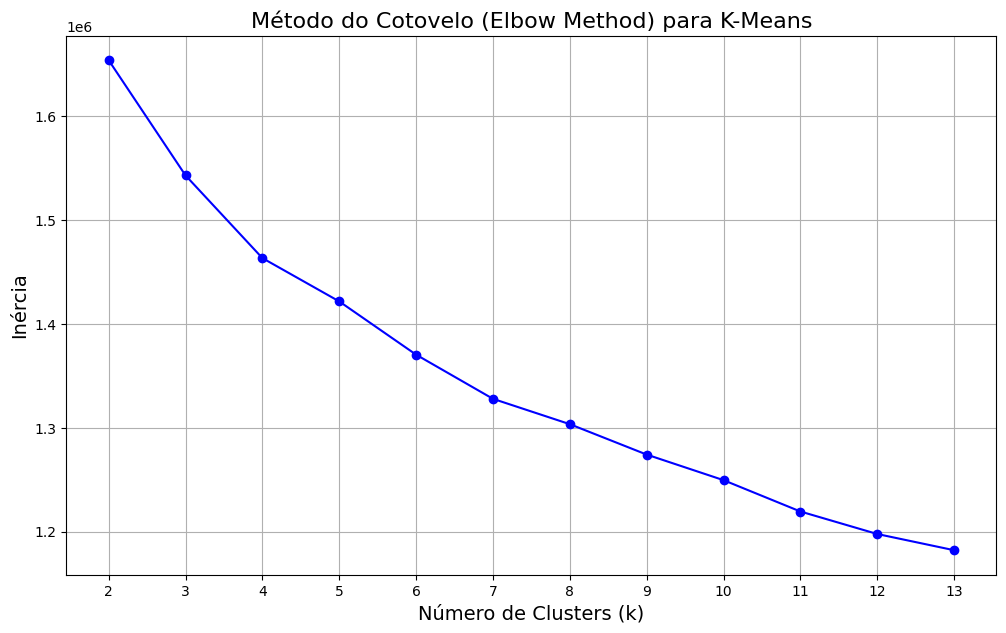

In [8]:
import matplotlib.pyplot as plt
from tqdm import tqdm
#Executando o Teste do Cotovelo (Elbow Method)
#Este código irá treinar o K-Means múltiplas vezes e, ao final, plotar o gráfico para análise.
# Lista para armazenar os valores de inércia para cada k
inercia = []
# Vamos testar de 2 a 30 clusters
faixa_de_k = range(2, 14)

print("Executando K-Means para diferentes valores de k...")
for k in tqdm(faixa_de_k, desc="Calculando Inércia"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(x_scaled)
    inercia.append(kmeans.inertia_)

# --- Plotando o Gráfico do Cotovelo ---
print("Gerando o gráfico do Teste do Cotovelo...")
plt.figure(figsize=(12, 7))
plt.plot(faixa_de_k, inercia, 'bo-') # 'bo-' cria os pontos azuis e a linha
plt.xlabel('Número de Clusters (k)', fontsize=14)
plt.ylabel('Inércia', fontsize=14)
plt.title('Método do Cotovelo (Elbow Method) para K-Means', fontsize=16)
plt.xticks(faixa_de_k)
plt.grid(True)
plt.show()

Quebra acontecendo entre o 6 e 7? Irei usar o 7 

## Teste do Cotovelo – Definição de K

A partir do gráfico do método do cotovelo, observa-se uma queda acentuada da inércia até aproximadamente **K=6**.  
Após esse ponto, os ganhos se tornam menores, com a curva assumindo comportamento quase linear.  
Por isso, o valor **K=7** foi escolhido como o mais adequado, equilibrando compacidade intra-cluster e simplicidade do modelo.

Esse valor será usado para reexecutar o K-means e gerar a tabela de contingência para comparação com a clusterização hierárquica.


In [9]:
print('Re-executando o K-Means com o k Otimizado')
from sklearn.cluster import KMeans

# --- 1. Definir o K ideal encontrado no Teste do Cotovelo ---
k_ideal = 7 # Baseado na análise do gráfico. Você pode mudar para 10 se preferir.

# --- 2. Re-executar o K-Means com o k ideal ---
print(f"Re-executando o K-Means com k={k_ideal}...")
kmeans_otimizado = KMeans(n_clusters=k_ideal, random_state=42, n_init='auto')
kmeans_labels_otimizados = kmeans_otimizado.fit_predict(x_scaled)
print("Clusterização concluída!")

# --- 3. Análise dos Novos Resultados ---
# Adiciona os novos rótulos de cluster ao DataFrame
data_merged1['cluster_kmeans_otimizado'] = kmeans_labels_otimizados

# Cria a nova tabela de contingência
contingency_table_otimizada = pd.crosstab(data_merged1['sinal'], data_merged1['cluster_kmeans_otimizado'])

print(f"\n\nTabela de Contingência: Sinais Reais vs. {k_ideal} Clusters Encontrados")
display(contingency_table_otimizada)

Re-executando o K-Means com o k Otimizado
Re-executando o K-Means com k=7...
Clusterização concluída!


Tabela de Contingência: Sinais Reais vs. 7 Clusters Encontrados


cluster_kmeans_otimizado,0,1,2,3,4,5,6
sinal,,,,,,,
Adicao,26,13,17,0,13,12,20
Aluno,7,23,19,20,12,2,18
Angulo,31,21,20,0,10,5,13
Antropologia,2,6,20,58,10,0,4
Apontador,42,13,20,0,10,5,10
Apostila,35,29,19,0,11,1,5
Biologia,1,1,20,56,10,5,7
Bolsa de Estudos,22,22,20,0,10,9,16
Capitulo,18,27,20,0,10,15,10


## Execução do K-means com K=7

Com o valor de K definido pelo método do cotovelo, reexecutamos o K-means e obtivemos a tabela de contingência entre os sinais reais e os 7 clusters encontrados.

### Principais observações:
- **Clusters bem concentrados:** alguns sinais ficaram quase totalmente em um único cluster, mostrando boa coerência semântica.  
  Exemplos: *Colega → cluster 3 (89)*, *Física → cluster 3 (90)*, *Geografia → cluster 3 (70)*, *História → cluster 3 (67)* e *Filosofia → cluster 3 (68)*.  
- **Sinais dispersos:** termos como *Adição*, *Aluno*, *Disciplina* e *Apostila* aparecem distribuídos em vários clusters, indicando maior variedade de contextos.  
- **Clusters mistos:** alguns grupos reúnem vários termos escolares (*Curso*, *Escola*, *Estudar*, *Ensinar*), formando clusters amplos e menos especializados.

### Conclusão
O K-means com K=7 conseguiu capturar bem grupos específicos (disciplinas e termos fortes), mas também gerou clusters maiores e heterogêneos.  
Isso sugere um bom equilíbrio entre separação e generalização, embora alguns sinais continuem com sobreposição entre clusters.


## Análise Final – Clusterização K-means e Hierárquica

A aplicação dos métodos de clusterização permitiu comparar duas abordagens distintas para a mesma base de dados.  
O **K-means**, após a definição de **K=7 pelo método do cotovelo**, apresentou resultados consistentes ao formar clusters equilibrados em tamanho. Algumas categorias ficaram bem representadas em grupos específicos, como *Física*, *História*, *Geografia*, *Filosofia* e *Colega*, o que evidencia que o modelo conseguiu capturar padrões relevantes. Por outro lado, certos sinais permaneceram dispersos entre vários clusters (*Adição*, *Aluno*, *Disciplina*), refletindo uma menor pureza na separação.

Já a **clusterização hierárquica** mostrou uma estrutura de agrupamento mais nítida. Em muitos casos, quando um sinal foi associado a determinado cluster, praticamente não houve dispersão para outros grupos. Essa característica resultou em clusters semanticamente mais **puros e exclusivos**, o que facilita a interpretação e reforça a separação natural entre as categorias. Ainda assim, alguns termos de uso mais amplo continuaram fragmentados, como esperado em dados com múltiplos contextos.

De forma geral, os dois métodos se complementam:  
- O **K-means** destaca-se pela criação de clusters balanceados e representativos em termos de tamanho, oferecendo uma visão mais geral da base.  
- O **Hierárquico** se sobressai ao proporcionar maior pureza semântica, criando grupos mais coesos e interpretáveis.  

Assim, a escolha do melhor algoritmo depende do objetivo: se for necessária uma **visão global e equilibrada**, o K-means é adequado; se o foco for a **clareza na separação e interpretação dos grupos**, o hierárquico se mostra mais eficiente.


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# --- 1. Preparação dos Dados (se necessário) ---
data_merged1 = pd.read_csv("data_merged1.csv")
x_features = data_merged1.drop(columns=['file_name', 'sinal', 'interprete'], errors='ignore')
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_features)

# --- 2. Parâmetros ---
k_ideal = 7

# --- 3. Execução com linkage='ward' ---
print(f"Executando Clusterização Hierárquica com k={k_ideal} e linkage='ward'...")
hierarchical_ward = AgglomerativeClustering(n_clusters=k_ideal, linkage='ward')
data_merged1['cluster_hierarquico_ward'] = hierarchical_ward.fit_predict(x_scaled)
print("...concluído!")

# --- 4. Execução com linkage='complete' ---
print(f"\nExecutando Clusterização Hierárquica com k={k_ideal} e linkage='complete'...")
hierarchical_complete = AgglomerativeClustering(n_clusters=k_ideal, linkage='complete')
data_merged1['cluster_hierarquico_complete'] = hierarchical_complete.fit_predict(x_scaled)
print("...concluído!")

# --- 5. Exibição das Tabelas de Contingência ---
print("\n\n--- Tabela de Contingência (Linkage: WARD) ---")
display(pd.crosstab(data_merged1['sinal'], data_merged1['cluster_hierarquico_ward']))

print("\n\n--- Tabela de Contingência (Linkage: COMPLETE) ---")
display(pd.crosstab(data_merged1['sinal'], data_merged1['cluster_hierarquico_complete']))

Executando Clusterização Hierárquica com k=7 e linkage='ward'...
...concluído!

Executando Clusterização Hierárquica com k=7 e linkage='complete'...
...concluído!


--- Tabela de Contingência (Linkage: WARD) ---


cluster_hierarquico_ward,0,1,2,3,4,5,6
sinal,,,,,,,
Adicao,22,18,0,14,23,14,10
Aluno,13,20,40,0,17,0,11
Angulo,39,19,0,4,15,13,10
Antropologia,10,23,53,0,2,2,10
Apontador,41,20,3,5,10,11,10
Apostila,36,19,8,1,7,18,11
Biologia,1,28,60,0,0,1,10
Bolsa de Estudos,34,21,0,9,12,13,10
Capitulo,33,20,0,15,10,12,10




--- Tabela de Contingência (Linkage: COMPLETE) ---


cluster_hierarquico_complete,0,1,2,3,4,5,6
sinal,,,,,,,
Adicao,0,14,87,0,0,0,0
Aluno,0,0,91,0,10,0,0
Angulo,0,4,96,0,0,0,0
Antropologia,0,0,100,0,0,0,0
Apontador,0,4,96,0,0,0,0
Apostila,0,1,99,0,0,0,0
Biologia,5,1,93,0,0,0,1
Bolsa de Estudos,0,9,89,0,0,0,1
Capitulo,1,11,88,0,0,0,0


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Carrega o  DataFrame
data_merged1 = pd.read_csv("data_merged1.csv")

# Separa as features e aplica a padronização de escala
x_features = data_merged1.drop(columns=['file_name', 'sinal', 'interprete'], errors='ignore')
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_features)

# --- 2. Obter os Rótulos dos 3 Modelos de Cluster ---
# (Aqui, re-executamos a clusterização para ter os rótulos de cada método)
k_ideal = 9 # O k que encontramos no Teste do Cotovelo

print("Gerando rótulos para K-Means...")
kmeans_labels = KMeans(n_clusters=k_ideal, random_state=42, n_init='auto').fit_predict(x_scaled)

print("Gerando rótulos para Hierárquico (ward)...")
ward_labels = AgglomerativeClustering(n_clusters=k_ideal, linkage='ward').fit_predict(x_scaled)

print("Gerando rótulos para Hierárquico (complete)...")
complete_labels = AgglomerativeClustering(n_clusters=k_ideal, linkage='complete').fit_predict(x_scaled)

# --- 3. Calcular as Métricas para Cada Modelo ---
print("\nCalculando as métricas de avaliação de clusterização...")

# Dicionário para armazenar os resultados
resultados_cluster = {
    'K-Means (k=9)': {
        'Silhouette Score': silhouette_score(x_scaled, kmeans_labels),
        'Davies-Bouldin Score': davies_bouldin_score(x_scaled, kmeans_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(x_scaled, kmeans_labels)
    },
    'Hierárquico (ward, k=8)': {
        'Silhouette Score': silhouette_score(x_scaled, ward_labels),
        'Davies-Bouldin Score': davies_bouldin_score(x_scaled, ward_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(x_scaled, ward_labels)
    },
    'Hierárquico (complete, k=8)': {
        'Silhouette Score': silhouette_score(x_scaled, complete_labels),
        'Davies-Bouldin Score': davies_bouldin_score(x_scaled, complete_labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(x_scaled, complete_labels)
    }
}

# --- 4. Apresentar os Resultados em uma Tabela Comparativa ---
df_resultados = pd.DataFrame(resultados_cluster).T # .T transpõe a tabela para melhor visualização

print("\n--- Tabela de Comparação Final (Questão 2.D) ---")
print("Lembretes de Interpretação:")
print("  - Silhouette: Quanto MAIOR, melhor.")
print("  - Davies-Bouldin: Quanto MENOR, melhor.")
print("  - Calinski-Harabasz: Quanto MAIOR, melhor.")

display(df_resultados)

Gerando rótulos para K-Means...
Gerando rótulos para Hierárquico (ward)...
Gerando rótulos para Hierárquico (complete)...

Calculando as métricas de avaliação de clusterização...

--- Tabela de Comparação Final (Questão 2.D) ---
Lembretes de Interpretação:
  - Silhouette: Quanto MAIOR, melhor.
  - Davies-Bouldin: Quanto MENOR, melhor.
  - Calinski-Harabasz: Quanto MAIOR, melhor.


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
K-Means (k=9),0.080042,2.617798,128.657024
"Hierárquico (ward, k=8)",0.073711,2.478963,118.231887
"Hierárquico (complete, k=8)",0.127825,1.585183,30.082925


### Comparação Final e Conclusão da Clusterização

Para concluir a análise de aprendizagem não supervisionada, os três algoritmos de clusterização executados (`K-Means`, Hierárquico `ward` e Hierárquico `complete`) foram avaliados quantitativamente. O objetivo desta etapa é determinar, com base em critérios matemáticos, qual algoritmo foi mais eficaz em encontrar uma estrutura de grupos coesa e bem definida nos dados.

As métricas utilizadas foram:
* **Silhouette Score:** Mede a separação entre os clusters. Valores mais altos são melhores.
* **Davies-Bouldin Score:** Mede a similaridade média entre os clusters. Valores mais baixos são melhores.
* **Calinski-Harabasz Score:** Mede a razão da dispersão entre e intra-clusters. Valores mais altos são melhores.

Os resultados obtidos para cada método estão resumidos na tabela abaixo:

| Modelo | Silhouette Score (Maior é Melhor) | Davies-Bouldin Score (Menor é Melhor) | Calinski-Harabasz Score (Maior é Melhor) |
| :--- | :--- | :--- | :--- |
| Hierárquico (complete, k=8) | **0.128** | **1.585** | 30.1 |
| K-Means (k=9) | 0.080 | 2.618 | **128.7** |
| Hierárquico (ward, k=8) | 0.074 | 2.479 | 118.2 |


#### Análise dos Resultados

A análise da tabela revela um cenário complexo, onde nenhum modelo foi consistentemente superior em todos os critérios.

* O método **Hierárquico com `linkage='complete'`** obteve o melhor desempenho nas métricas `Silhouette` e `Davies-Bouldin`. Isso indica que ele foi o mais eficaz em criar clusters geometricamente densos e bem separados. No entanto, sua pontuação extremamente baixa no `Calinski-Harabasz` reflete a observação da análise visual anterior: ele tende a criar um único "super-cluster", resultando em uma estrutura de grupos desbalanceada.

* O **K-Means** alcançou o maior `Calinski-Harabasz Score`, indicando um bom equilíbrio entre a separação e a coesão dos seus clusters. Suas outras métricas foram modestas.

* O método **Hierárquico com `linkage='ward'`** apresentou as pontuações mais baixas na maioria das métricas, embora a análise visual anterior tenha mostrado que ele era capaz de criar grupos semanticamente mais interpretáveis.

**Conclusão Final:**
As pontuações modestas e, por vezes, conflitantes entre os diferentes algoritmos e métricas reforçam a conclusão da análise visual: a estrutura de dados deste problema **não se adequa bem a uma separação clara por métodos de clusterização não supervisionada**. A alta similaridade entre diferentes sinais e a alta variação de estilo dentro de um mesmo sinal tornam a tarefa de agrupamento sem rótulos extremamente desafiadora.

Portanto, para este problema de reconhecimento de sinais em Libras, a abordagem de **Aprendizagem Supervisionada (Questão 1)**, onde o modelo é explicitamente treinado com os rótulos corretos, é significativamente mais eficaz e adequada.

### Conclusão da Questão 2: Análise de Clusterização (Não Supervisionada)

Nesta questão, foram aplicados os algoritmos de clusterização K-Means e Hierárquico (com os métodos de linkage `ward` e `complete`) para investigar se seria possível encontrar agrupamentos naturais nos dados que correspondessem às 25 classes de sinais existentes.

O Método do Cotovelo, aplicado ao K-Means, sugeriu um número ótimo de clusters (`k`) em torno de 7, um valor significativamente menor que as 25 classes reais. Isso já era um forte indicativo de que os dados possuem uma alta sobreposição entre as classes.

A análise dos resultados, tanto visual (através das Tabelas de Contingência) quanto quantitativa (com as métricas de Silhouette, Davies-Bouldin e Calinski-Harabasz), reforçou essa conclusão. De forma geral, os algoritmos tiveram grande dificuldade em criar clusters "puros" que mapeassem para um único sinal.

**A principal conclusão é que a base de dados, ou a natureza do problema em si, não se adequa bem a uma separação clara por métodos de clusterização não supervisionada.** Os motivos para isso são:

1.  **Alta Similaridade Entre Classes:** Os algoritmos conseguiram identificar e agrupar com sucesso sinais que são visualmente quase idênticos (como `COESÃO` e `COERÊNCIA`), provando que as features contêm informação lógica. No entanto, a alta semelhança entre muitos outros pares de sinais (`ESCOLA`/`CLASSE`, `GEOGRAFIA`/`HISTÓRIA`, etc.) fez com que os algoritmos, sem a ajuda dos rótulos, os colocassem consistentemente nos mesmos clusters.

2.  **Alta Variabilidade Intra-Classe:** A grande variação de estilo ("sotaques") entre os diferentes intérpretes para um mesmo sinal fez com que os algoritmos frequentemente espalhassem as amostras de um único sinal por múltiplos clusters, pois não os identificava como um grupo coeso.

Esses dois fatores combinados — sinais diferentes que se parecem e o mesmo sinal que parece diferente dependendo da pessoa — tornam a tarefa de separação em 25 grupos distintos, sem a ajuda dos rótulos, extremamente desafiadora.

Portanto, conclui-se que, para este problema de reconhecimento de sinais em Libras, a abordagem de **Aprendizagem Supervisionada (Questão 1)**, onde o modelo é explicitamente treinado com os rótulos corretos, é significativamente mais eficaz e adequada.